## AC

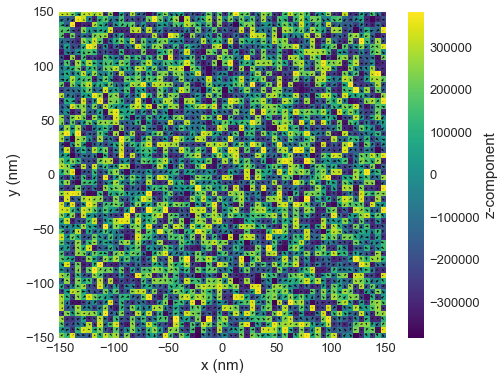

In [1]:
%matplotlib inline
import discretisedfield as df
import matplotlib.pyplot as plt
import micromagneticmodel as mm
import numpy as np
import oommfc as oc
import ubermagutil.units as uu

import mag2exp

np.random.seed(1)

region = df.Region(p1=(-150e-9, -150e-9, 0), p2=(150e-9, 150e-9, 50e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9), bc="xy")

system = mm.System(name="Box2")

system.energy = (
    mm.Exchange(A=4.75e-12)
    + mm.DMI(D=0.853e-3, crystalclass="T")
    + mm.Zeeman(H=(0, 0, 0))
)

Ms = 384e3  # A/m


def m_fun(pos):
    return 2 * np.random.rand(3) - 1


# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=m_fun, norm=Ms)
system.m.plane("z").mpl()

Relax the system and plot its magnetisation.

Running OOMMF (DockerOOMMFRunner) [2021/08/06 15:40]... (16.9 s)


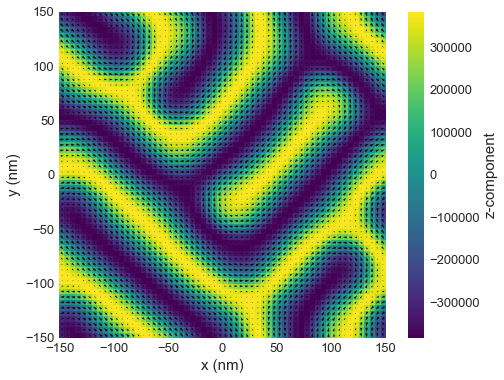

In [2]:
# minimize the energy
md = oc.MinDriver()
md.drive(system)

# Plot relaxed configuration: vectors in z-plane
system.m.plane("z").mpl()

Now we have a magnetisation texture we can compute the magnetisation of the sample.

hac = (0, 0, 238.7)
x_arr = np.linspace(0, 4*np.pi, 20)

ac = []
dc = []
for hz in np.linspace(0, 80*79577, 21):
    mz_ac = []
    for x in x_arr:
        system.energy.zeeman.H = np.array((hac[0]*np.sin(x), hac[1]*np.sin(x), hac[2]*np.sin(x))) + np.array((0, 0, hz))
        md.drive(system)
        mz_ac.append(mag2exp.magnetometry.magnetisation(system.m)[2])
    dc.append(hz)
    ac.append((np.max(mz_ac)-np.min(mz_ac))/(2*hac[2]))

plt.scatter(dc[1:], ac[1:])

system.m.plane('z').mpl()

plt.plot(mz_ac/np.max(mz_ac))
plt.plot(hac[2]*np.sin(x_arr)/np.max(hac[2]*np.sin(x_arr)))

(np.max(mz_ac)-np.min(mz_ac))/(2*hac[2])

plt.plot(mz_ac)

system.table.data.head()

for x in x_arr:
    np.array((hac[0]*np.sin(x), hac[1]*np.sin(x), hac[2]*np.sin(x))) + hdc

np.array((hac[0]*np.sin(x), hac[1]*np.sin(x), hac[2]*np.sin(x))) + hdc

system.energy.zeeman.H = (0, 0, 20*7957)

# minimize the energy
md = oc.MinDriver()
md.drive(system)

# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

system.m.plane('x').mpl()